In [61]:
#standard import
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# for generating plots
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# statisical
import statsmodels.api as sm

### The Dataset

We'll be using the data set from UCLA's tutorial on logistic regression. The goal is to identify the various factors that may influence admission into grad school. 

In [6]:
# load the data using pandas.csv
df = pd.read_csv('http://www.karlin.mff.cuni.cz/~pesta/prednasky/NMFM404/Data/binary.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [9]:
df.columns

Index([u'admit', u'gre', u'gpa', u'rank'], dtype='object')

In [16]:
# change the column name rank to distinguish from a method called rank
df.columns = ['admit', 'gre', 'gpa', 'prestige']

#### Look at Summary Statistics

In [17]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [20]:
# frequency table
pd.crosstab(df.admit,df.prestige,rownames=  ['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


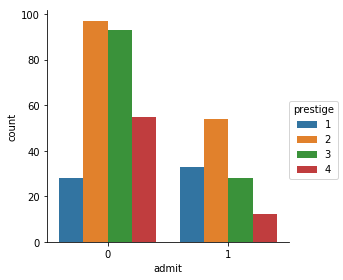

In [26]:
# visualization
sns.factorplot('admit',hue = 'prestige',data= df, kind = 'count')

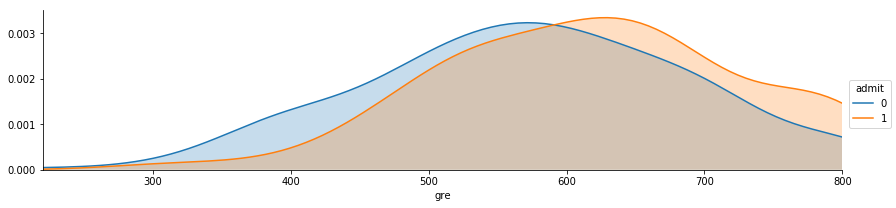

In [34]:
#use FacetGrid to have multiple plots overlaid on each other.

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df,hue = 'admit',aspect =4)

# Next use map to plot all the possible kdeplots for the 'gre' column by the hue choice
fig.map(sns.kdeplot,'gre',shade = True)

low = df['gre'].min()
high =df['gre'].max()
fig.set(xlim=(low,high))
fig.add_legend()

Those who are admited tend to have a higher gre score.

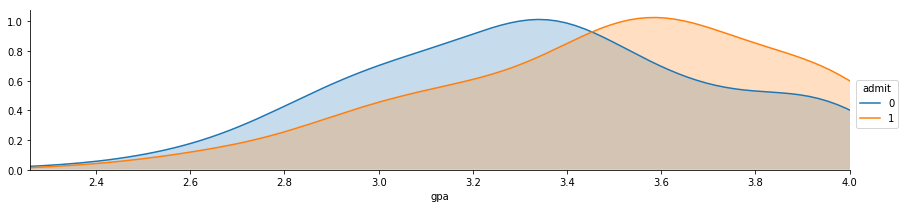

In [36]:
fig = sns.FacetGrid(df,hue = 'admit',aspect =4)

fig.map(sns.kdeplot,'gpa',shade = True)

low = df['gpa'].min()
high =df['gpa'].max()
fig.set(xlim=(low,high))
fig.add_legend()

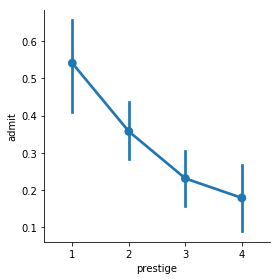

In [39]:
sns.factorplot('prestige','admit',data= df)

### Prepare the data ready 

In [40]:
# create dummies for prestige
dummy_prestige=  pd.get_dummies(df['prestige'],prefix= 'prestige')

In [41]:
dummy_prestige.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [51]:
# two ways to add dummy dataframe to the original df
X=pd.concat([df,dummy_prestige],axis = 1)


Alternatively,
```python
X= df.join(dummy_prestig[:,'prestige_2':])
```

In [52]:
X.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [53]:
Y=X.admit

In [54]:
# drop prestige and prestige_1
X.drop(['admit','prestige','prestige_1'],axis=1,inplace = True)

In [55]:
X.head()

,gre,gpa,prestige_2,prestige_3,prestige_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1


In [56]:
# need to manually add intercept terms as is required by statsmodels
X['intercept'] = 1

### Fit the logistic model

In [66]:
# Logit regression model object/class
logit = sm.GLM(Y,X, family=sm.families.Binomial())

In [67]:
result = logit.fit()

In [68]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Thu, 14 Jun 2018   Deviance:                       458.52
Time:                        13:42:52   Pearson chi2:                     397.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

As one can see from the estimated coefficients, hihgher gre or gpa increases the likelihood of one's admission.

In [71]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

An exponentiated coefficient is the odds ratio with respect to 1 unit change in the effect.<br>
For example, on average, the odds of admission doubles if one's GRE score increase by 1 unit. All else being equal, if the rank/prestige of one's undergrad goes from 1 to 2, the odds decreases by about 50%.

In [74]:
# the 95% CI around the odds ratio
conf = np.exp(result.conf_int())
conf['OR'] = np.exp(result.params)
conf.columns = ['2.5%','97.5%','OR']

In [75]:
conf

,2.5%,97.5%,OR
gre,1.000120,1.004418,1.002267
gpa,1.166122,4.281877,2.234545
prestige_2,0.273692,0.946358,0.508931
prestige_3,0.133055,0.515089,0.261792
prestige_4,0.093443,0.480692,0.211938
intercept,0.001981,0.172783,0.018500
